In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

In [2]:
doc_topic = np.load('./ENdata/doc_topic14.npy')

In [3]:
doc_topic[0]

array([0.33535489, 0.02960433, 0.02960433, 0.02960433, 0.02960433,
       0.02960433, 0.02960433, 0.02960433, 0.02960433, 0.02960433,
       0.02960433, 0.02960433, 0.02960433, 0.30939311])

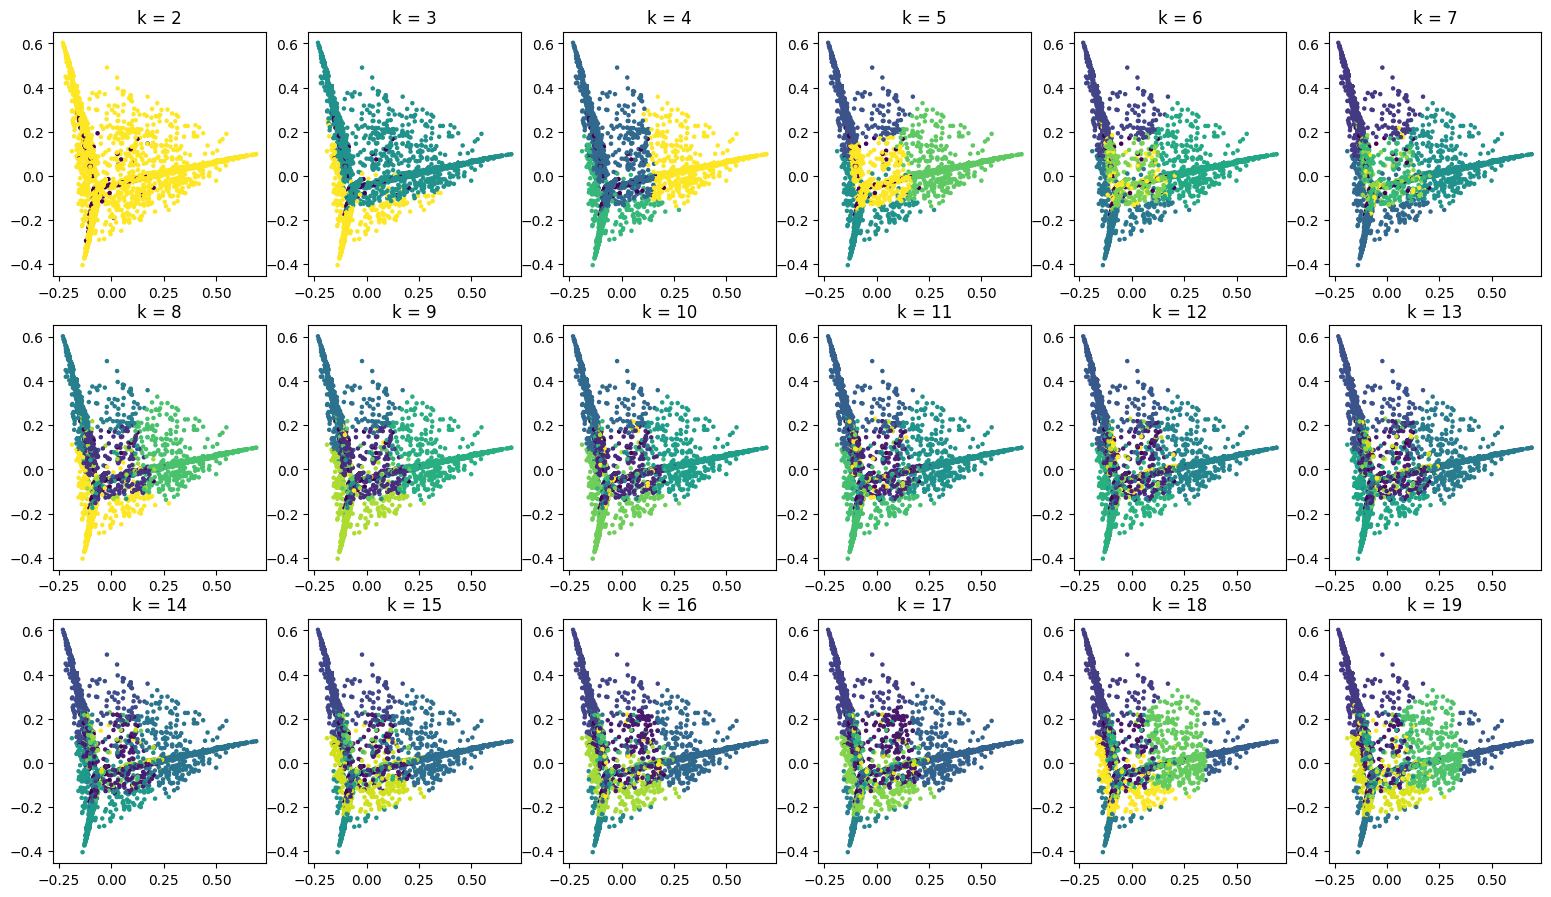

In [6]:
# PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_topic)
fig = plt.figure(figsize=(19.20, 10.80))
for n in range(2, 20):
    model = KMeans(n_clusters=n, n_init='auto', random_state=0)
    model.fit(doc_topic)
    joblib.dump(model,f'./kmeansModel/EN14/model/{n}.model')
    result = model.predict(doc_topic)
    labels = model.labels_
    # 散点图
    plt.subplot(3, 6, n - 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=5, cmap='viridis')
    plt.title(f'k = {n}')
plt.savefig('./clusterView/EN14/view.png')

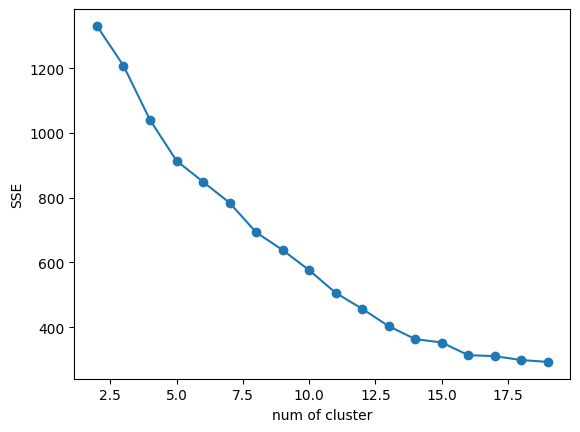

In [8]:
sse = []
for n in range(2, 20):
    model = joblib.load(f'./kmeansModel/EN14/model/{n}.model')
    result = model.predict(doc_topic)
    labels = model.labels_
    # 误差平方和SSE，用于手肘法
    sse.append(model.inertia_)
plt.plot(range(2, 20), sse, 'o-')
plt.xlabel('num of cluster')
plt.ylabel('SSE')
plt.savefig('./ENdata/topic14/误差平方和.png')
plt.show()

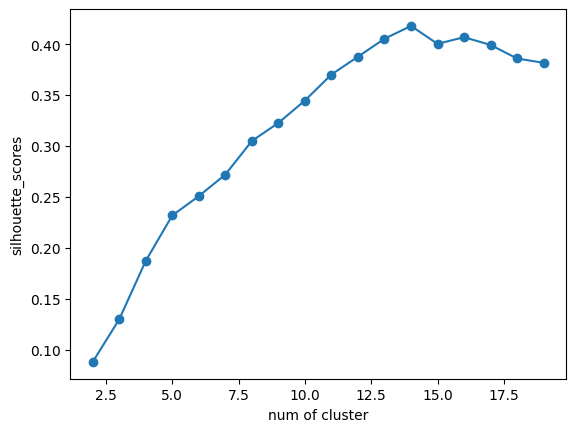

In [9]:
silhouette_scores = []
for n in range(2, 20):
    model = joblib.load(f'./kmeansModel/EN14/model/{n}.model')
    result = model.predict(doc_topic)
    labels = model.labels_
    # 轮廓系数，越高越好
    score = silhouette_score(doc_topic, labels)
    silhouette_scores.append(score)
plt.plot(range(2, 20), silhouette_scores, 'o-')
plt.xlabel('num of cluster')
plt.ylabel('silhouette_scores')
plt.savefig('./ENdata/topic14/轮廓系数.png')
plt.show()

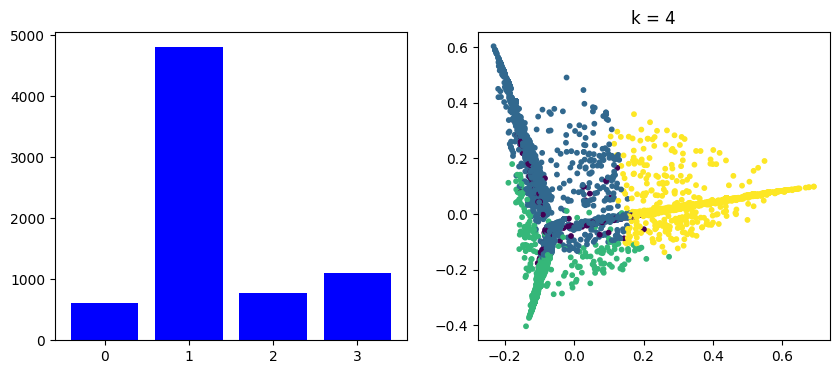

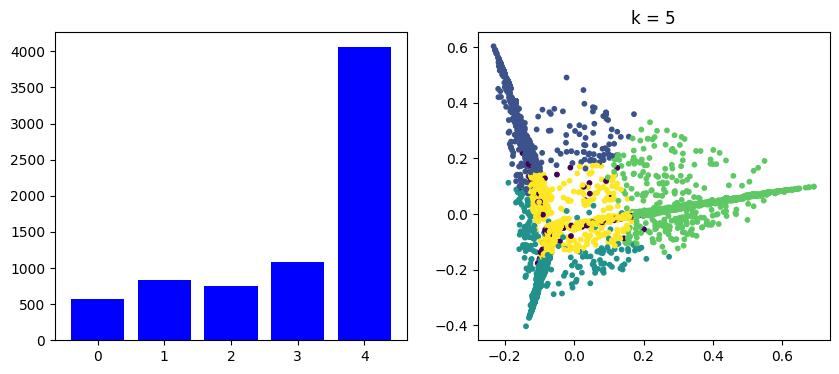

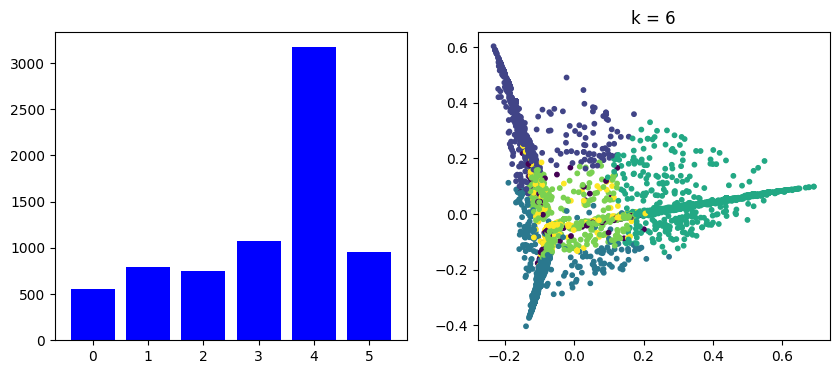

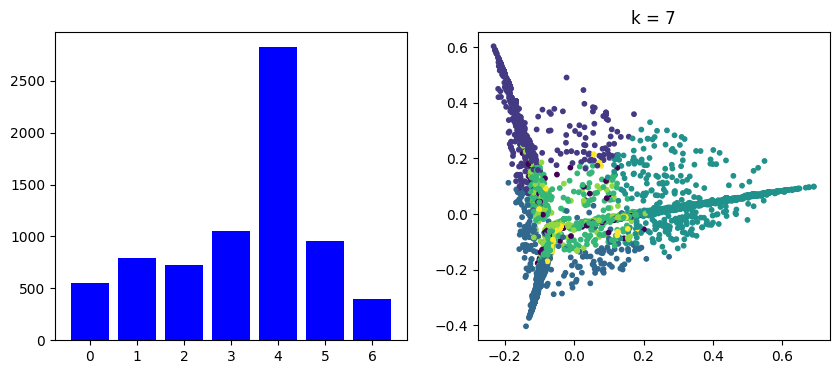

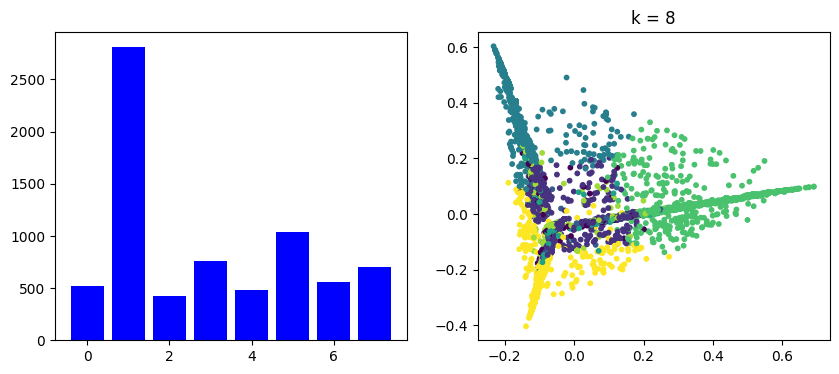

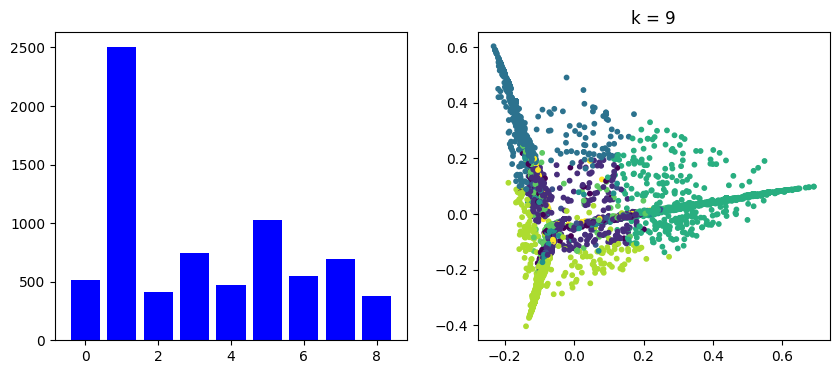

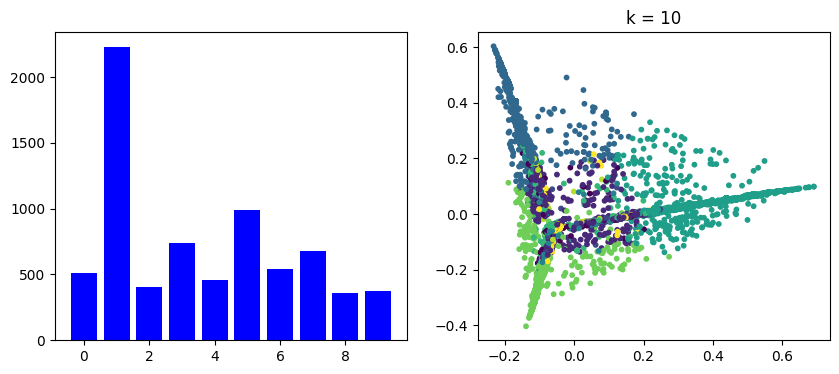

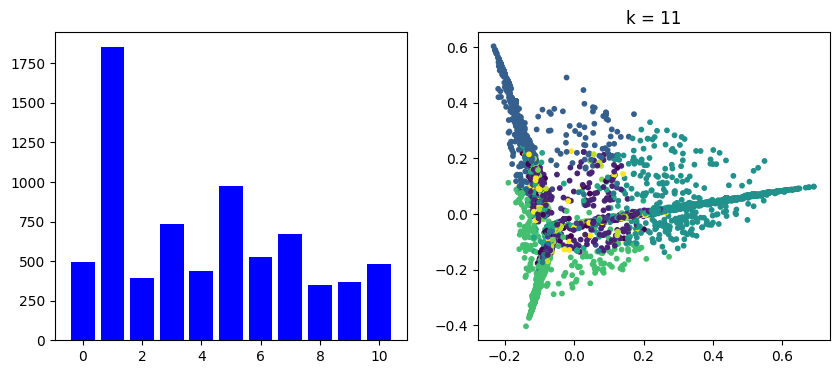

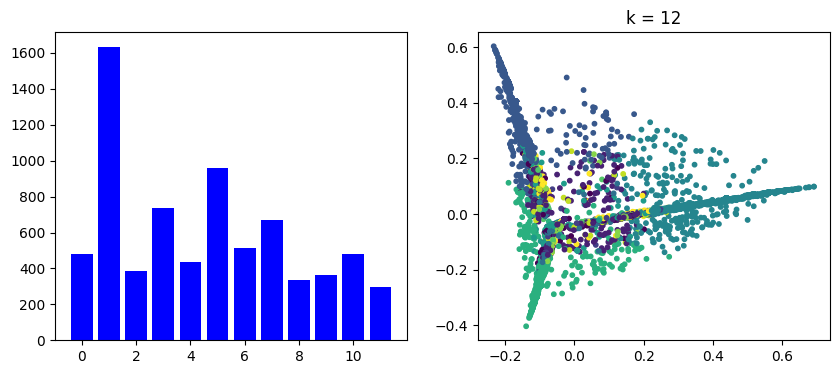

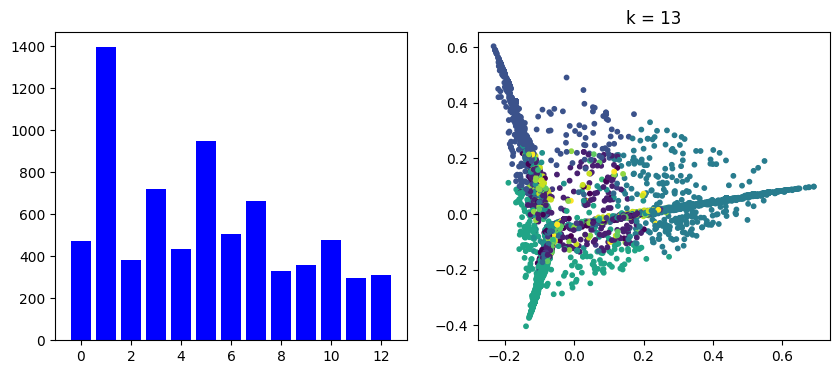

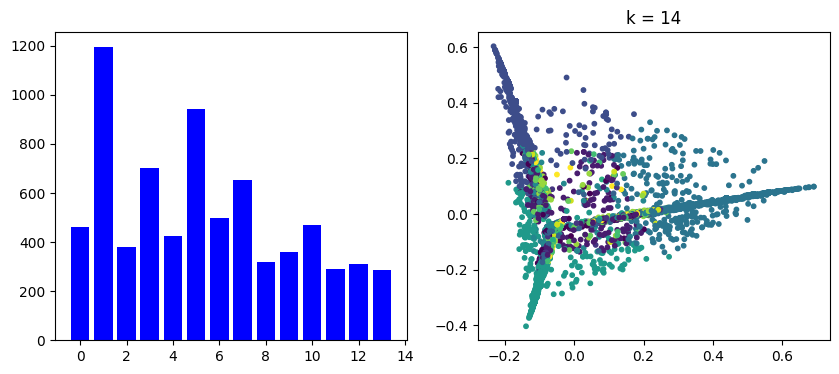

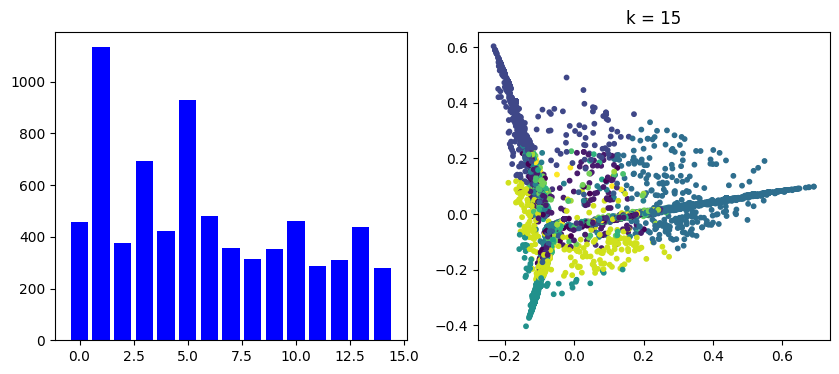

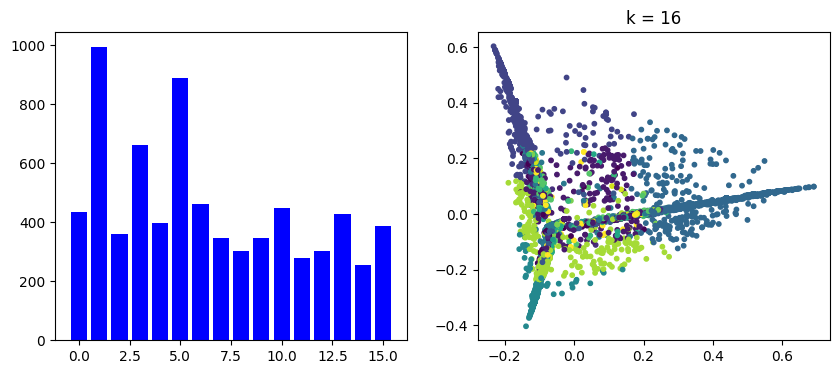

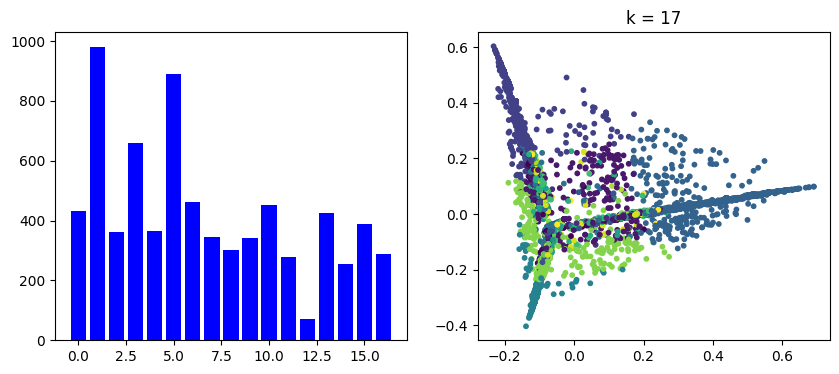

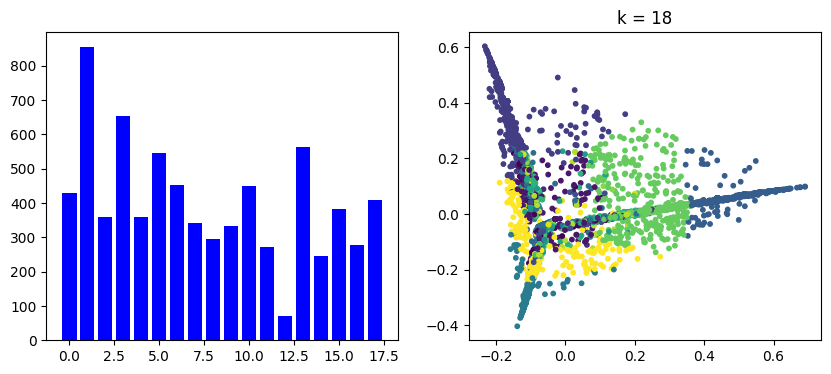

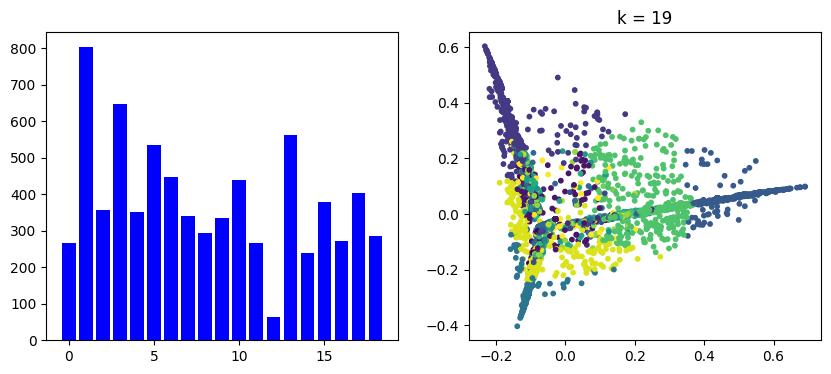

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_topic)
for n in range(4, 20):
    model = joblib.load(f'./kmeansModel/EN14/model/{n}.model')
    result = model.predict(doc_topic)
    labels = model.labels_
    fig = plt.figure(figsize=(10, 4))
    # 柱状图
    plt.subplot(1, 2, 1)
    x_list = list(range(n))
    y_list = np.zeros(n)
    for i in result:
        y_list[i] += 1
    plt.bar(x_list, y_list, color='blue')
    # 散点图
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10, cmap='viridis')
    plt.title(f'k = {n}')
    plt.savefig(f'./clusterView/EN14/分类图{n}')
    plt.show()

In [11]:
doc_topic = np.load('./ENdata/doc_topic14.npy')

model = joblib.load('./kmeansModel/EN14/model/14.model')
result = model.predict(doc_topic)
# 判断该文档是不是该主题的
mask = doc_topic < 1 / 14
doc_topic[mask] = 0
doc_topic[~mask] = 1
doc_topic.shape
doc_topic[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [12]:
# A的行为kmeans分出的类别，列为该类别中含各个主题的文档数量
A = np.zeros([14, 14])
category = np.zeros(14)
topic = np.sum(doc_topic, axis=0)
topic

array([1582., 1350., 1543., 1553., 1501., 1442., 1743., 1403., 2133.,
       1879., 1567., 1476., 1436., 1309.])

In [13]:
for i in range(len(result)):
    row = doc_topic[i]
    category[result[i]] += 1
    for j, item in enumerate(row):
        if item == 1:
            A[result[i]][j] += 1
print(A)
print(np.sum(A, axis=1))

[[  42.   36.   22.  463.   20.   36.   35.   32.   46.   37.   48.   34.
    34.   20.]
 [ 632.  609.  628.  613. 1090.  618.  631.  640.  659.  642.  628.  627.
   611.  633.]
 [  28.   26.   20.   27.   15.   30.   23.   21.   30.   34.   31.   23.
   382.   19.]
 [  69.   57.   72.   67.   41.   48.   53.   60.   62.  702.   71.   60.
    72.   46.]
 [  38.   26.   26.   37.   18.   35.   33.   37.   29.   31.  426.   37.
    28.   24.]
 [  76.   89.   92.   71.   77.  106.  114.   98.  941.  111.   95.  111.
    82.   98.]
 [  63.   62.  500.   83.   59.   51.   55.   44.   60.   67.   46.   46.
    42.   45.]
 [  60.   72.   52.   51.   55.   66.  651.   65.   71.   88.   82.   65.
    56.   40.]
 [  25.   15.   24.   21.   16.  319.   28.   26.   26.   38.   26.   21.
    21.   17.]
 [  21.   16.   24.   15.   23.   25.   23.   17.   40.   17.   28.  358.
    20.   20.]
 [ 469.   31.   24.   43.   46.   43.   32.   24.   60.   45.   36.   39.
    33.   38.]
 [  15.   13.   22.  

In [14]:
# 计算卡方分布
CHI = np.zeros([14, 14])
for i in range(14):
    for j in range(14):
        a = A[i][j]
        b = category[i] - a
        c = topic[j] - a
        n = len(result)
        d = n - a - b - c
        CHI[i][j] = n * (a*d - b*c)**2 / ((a+c)*(b+d)*(a+b)*(c+d))
np.set_printoptions(suppress=True)
print(CHI)
# np.save('./ENdata/topic14/CHI.npy', CHI)

[[  46.34101743   37.75917212   79.74770806 1827.5890857    79.96358519
    44.84085762   72.55506724   48.33016609   89.07262002   81.62459655
    36.21709925   50.90978912   47.64333204   62.33979549]
 [ 818.9634829   997.99854827  844.69364741  767.80712721 4362.74825913
   919.5274762   656.66489911 1083.65818865  463.43590177  584.31532951
   817.82776515  919.90458544  893.57530272 1190.54412851]
 [  48.93546549   36.5991071    61.24444551   48.66372424   68.39084828
    36.08843454   70.82724618   48.97024711   89.13454835   59.91922265
    42.7079184    50.46409497 1644.44866221   46.06765753]
 [  64.32678799   55.58113903   55.30935207   63.96394794  103.23241285
    81.8999234   114.12949633   57.11651351  156.39901393 2238.50131209
    59.52508064   65.75020306   43.69474875   68.4749247 ]
 [  43.42971292   46.15969438   61.4473322    42.90165182   74.02836592
    38.07588721   64.88529263   32.41134682  110.06042754   80.82370596
  1653.49641726   37.39451246   49.21367742 

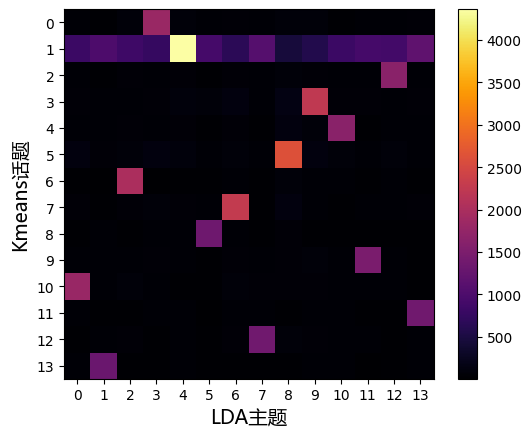

In [15]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=14) 
# CHI = np.load('./ENdata/CHI.npy')
plt.imshow(CHI, cmap='inferno', interpolation='nearest')
plt.colorbar()
plt.xlabel('LDA主题', fontproperties=font)  
plt.ylabel('Kmeans话题', fontproperties=font)  
# plt.title('卡方检验结果', fontproperties=font)  
plt.xticks(np.arange(0, 14, step=1))
plt.yticks(np.arange(0, 14, step=1))
plt.savefig('./ENdata/topic14/卡方检验结果.png')
plt.show()

<BarContainer object of 14 artists>

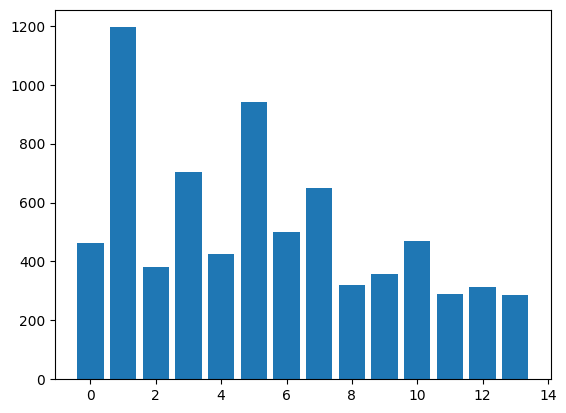

In [16]:
doc_topic = np.load('./ENdata/doc_topic14.npy')
model = joblib.load('./kmeansModel/EN14/model/14.model')
result = model.predict(doc_topic)
x_list = list(range(14))
y_list = np.zeros(14)
for i in result:
    y_list[i] += 1
plt.bar(x_list, y_list)

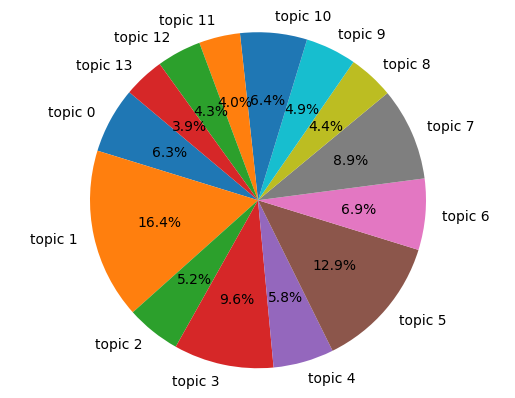

In [17]:
labels = ['topic ' + str(item) for item in x_list]
plt.pie(y_list, labels=labels, autopct='%1.1f%%', startangle=140)  
plt.axis('equal')
plt.savefig('./ENdata/topic14/第一部分各话题占比.png')
plt.show()